In [178]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, AffinityPropagation
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import scipy
import scipy.cluster.hierarchy as sch
from kmodes.kmodes import KModes
import matplotlib.cm as cm
%matplotlib inline

In [24]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [26]:
df_v1 = pd.read_csv("./Data/version_1_cleaned.csv", index_col = "Unnamed: 0")

In [27]:
df_v1.fillna(value = 9999, inplace = True)

### EDA 

This data is based on the labeled numeric data, please refer to the data dictionary if you would like to make sense of the plots 

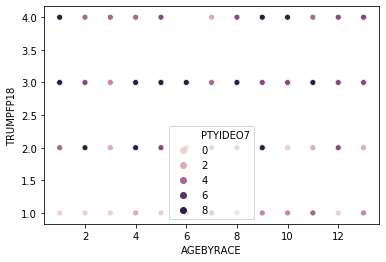

In [191]:
ax = sns.scatterplot(x = 'AGEBYRACE', y = 'TRUMPFP18', hue ='PTYIDEO7', 
                data = df_v1)

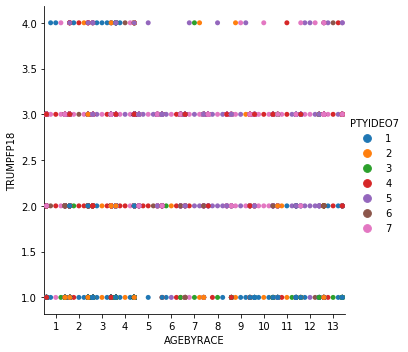

In [196]:
sns.catplot(x="AGEBYRACE", y="TRUMPFP18", kind = 'swarm', hue= 'PTYIDEO7', data=df_v1);

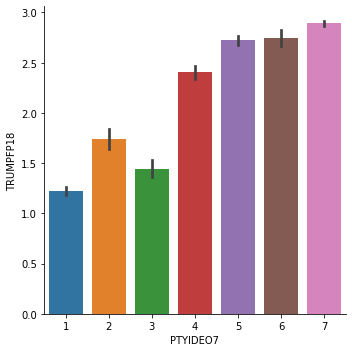

In [204]:
sns.catplot(x="PTYIDEO7", y="TRUMPFP18", kind="bar", data=df_v1);


### Nearest Neighbors 

In [70]:
neigh = NearestNeighbors(n_neighbors = 4)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

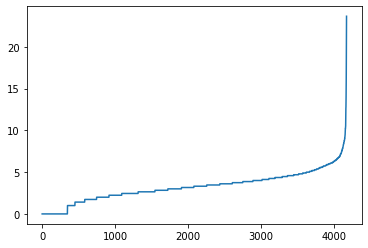

In [71]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [72]:
m = DBSCAN(eps=2.5, min_samples=5)
m.fit(X)

DBSCAN(algorithm='auto', eps=2.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [75]:
clusters = m.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

### DBSCAN 

In [184]:
X = df_v1.drop(['ID', 'VERSION', 'WEIGHT'], axis = 1)
ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)

/Users/nathan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/nathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [159]:
dbscan = DBSCAN(eps = 6, min_samples = 12)

In [160]:
dbscan.fit(X_scaled)

DBSCAN(algorithm='auto', eps=6, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=12, n_jobs=None, p=None)

In [161]:
silhouette_score(X_scaled, labels = dbscan.labels_)

0.24227887385093513

### K Means 

In [162]:
X = np.array(df_v1.drop(['ID', 'VERSION', 'WEIGHT', 'PTYIDEO7'], axis = 1 ).astype(float))
y = np.array(df_v1['PTYIDEO7'])

In [163]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0, max_iter = 600, algorithm= 'auto')
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [180]:
scores = []
for k in range(2,31):
    cl = KMeans(k, random_state= 1234)
    cl.fit(X_scaled)
    inertia = cl.inertia_
    sil = silhouette_score(X_scaled, cl.labels_)
    scores.append((k, inertia, sil))

In [181]:
score_df =pd.DataFrame(scores, columns = ['k', 'inertia', 'sil'])
score_df.head()

,k,inertia,sil
0,2,11583.953154,0.156643
1,3,10303.415530,0.141175
2,4,9818.310332,0.121039
3,5,9386.823358,0.111976
4,6,9073.300884,0.113165


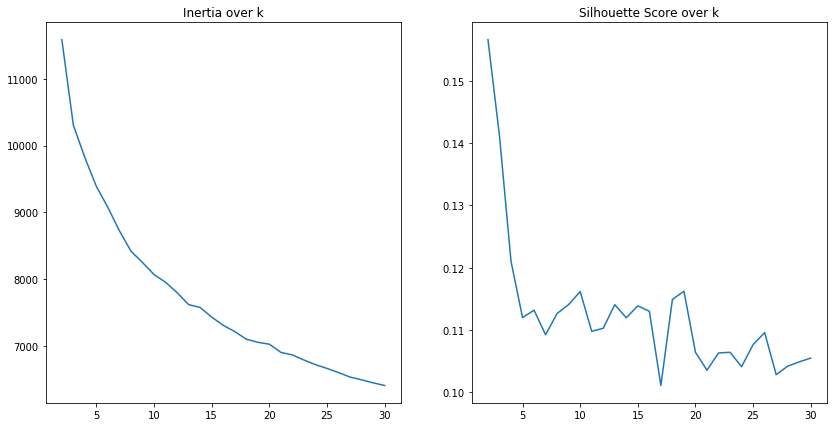

In [182]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.sil);
axes[1].set_title('Silhouette Score over k');

### K Modes

In [ ]:
best_score = []
for x in range(0, 15):
    km = KModes(n_clusters = x, init = 'Huang', n_init = 5)
    clusters = km.fit_predict(X)
    labels = km.labels_
    sil = silhouette_score(X, km.labels_)
    print(x)
    best_score.append(sil)
    print(best_score)

In [219]:
km = KModes(n_clusters = 12, init = 'Huang',  n_init=5)

In [220]:
clusters = km.fit_predict(X)

# Print the cluster centroids
print(km.cluster_centroids_)

[[ 1.  1.  2.  1.  6.  4.  1.  2.  2.  2.  1.  2.  1.  5.  1.  4.  1.  2.
   2.  1. 36.  2.  2.  1.  1.  3.  1.  2.  2.  1.]
 [ 1.  1.  1.  1.  8.  4.  2.  4.  2.  3.  3.  3.  1.  4.  1.  3.  1.  3.
   1.  1.  4.  2.  2.  1.  1.  3.  1.  2.  2.  1.]
 [ 1.  1.  2.  1.  8.  4.  1.  4.  2.  2.  1.  2.  2.  7.  1.  1.  2.  3.
   2.  1.  4.  2.  2.  1.  1.  3.  1.  2.  2.  1.]
 [ 1.  1.  2.  1.  8.  4.  1.  4.  2.  3.  3.  4.  1.  4.  1.  4.  1.  3.
   2.  1.  4.  2.  2.  1.  1.  3.  1.  2.  2.  1.]
 [ 2.  2.  1.  2.  6.  3.  1.  2.  2.  1.  2.  5.  3.  1.  1.  2.  1.  1.
   1.  1. 33.  1.  1.  3.  2.  1.  2.  2.  2.  1.]
 [ 1.  1.  1.  1.  1.  9.  3.  2.  1.  6.  1.  1.  1.  5.  3.  1.  1.  3.
   5.  2.  4.  2.  2.  1.  1.  3.  1.  2.  2.  1.]
 [ 2.  2.  2.  2.  3.  2.  4.  4.  2.  1.  2.  6.  1.  2.  1.  4.  1.  2.
   2.  1. 36.  1.  1.  3.  2.  1.  2.  2.  2.  1.]
 [ 2.  2.  2.  2.  8.  4.  1.  4.  2.  1.  2.  6.  3.  1.  1.  3.  1.  3.
   2.  1.  4.  1.  1.  3.  2.  1.  2.  2.  2.  2.]


In [222]:
print(km.cluster_centroids_)

[[ 1.  1.  2.  1.  6.  4.  1.  2.  2.  2.  1.  2.  1.  5.  1.  4.  1.  2.
   2.  1. 36.  2.  2.  1.  1.  3.  1.  2.  2.  1.]
 [ 1.  1.  1.  1.  8.  4.  2.  4.  2.  3.  3.  3.  1.  4.  1.  3.  1.  3.
   1.  1.  4.  2.  2.  1.  1.  3.  1.  2.  2.  1.]
 [ 1.  1.  2.  1.  8.  4.  1.  4.  2.  2.  1.  2.  2.  7.  1.  1.  2.  3.
   2.  1.  4.  2.  2.  1.  1.  3.  1.  2.  2.  1.]
 [ 1.  1.  2.  1.  8.  4.  1.  4.  2.  3.  3.  4.  1.  4.  1.  4.  1.  3.
   2.  1.  4.  2.  2.  1.  1.  3.  1.  2.  2.  1.]
 [ 2.  2.  1.  2.  6.  3.  1.  2.  2.  1.  2.  5.  3.  1.  1.  2.  1.  1.
   1.  1. 33.  1.  1.  3.  2.  1.  2.  2.  2.  1.]
 [ 1.  1.  1.  1.  1.  9.  3.  2.  1.  6.  1.  1.  1.  5.  3.  1.  1.  3.
   5.  2.  4.  2.  2.  1.  1.  3.  1.  2.  2.  1.]
 [ 2.  2.  2.  2.  3.  2.  4.  4.  2.  1.  2.  6.  1.  2.  1.  4.  1.  2.
   2.  1. 36.  1.  1.  3.  2.  1.  2.  2.  2.  1.]
 [ 2.  2.  2.  2.  8.  4.  1.  4.  2.  1.  2.  6.  3.  1.  1.  3.  1.  3.
   2.  1.  4.  1.  1.  3.  2.  1.  2.  2.  2.  2.]


In [223]:
sil = silhouette_score(X, km.labels_)

In [224]:
sil

-0.20930039977312373